In [250]:
'''
File name: preprocessing.ipynb
Authors: Yasmin El Euch, Aliénor Bénédicte G Hamoir, Clara Rossignol, Guillaume David E. Ryelandt
Date created: 04/11/2022
Date last modified: 18/11/2022
Python version: 3.8.8
'''

'\nFile name: preprocessing.ipynb\nAuthors: Yasmin El Euch, Aliénor Bénédicte G Hamoir, Clara Rossignol, Guillaume David E. Ryelandt\nDate created: 04/11/2022\nDate last modified: 18/11/2022\nPython version: 3.8.8\n'

# Oscar_preprocess


The goal here is to 

## Table of contents

0. [General Information](#GI)\
        A. [Folder structure](#Folder)\
        B. [Data](#Data)\
        C. [Imports](#Imports)\
        D. [Paths](#Paths)

1. [Data scraping, pre-processing and dataset construction](#Step-1)\
        A. [Pre-processing](#Pre-pro)\
        B. [First insights on gender gap](#First_insights)

2. [Box office revenues, salaries](#Box_Office)
3. [Detecting main characters](#Main_characters)
4. [Discrimination through types of roles attribution and its evolution in time](#Types)


---
## General Information <a id="GI"> </a> 

### Folder structure <a id="Folder"> </a>


### Imports <a id="Imports"> </a>

***Libraries used for milestone 2:***
- python=3.8.12
- pandas
- ast
- datetime
- seaborn
- numpy
- matplotlib
- json

In [1]:
#Imports used in this notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import t

### Paths <a id="Paths"> </a>

Required to adapt those path to local file organization

In [2]:
### PATHs for dataset:
PATH_DATA = 'data/'

#additionnal datasets:
PATH_MOVIE_OSCAR_NOMINEES = PATH_DATA+'oscar_nominees.csv'

---
##  Data scraping, pre-processing and dataset construction<a id="Step-1"> </a>

### Pre-processing <a id="#Pre-pro"> </a>
>basic sanity checks etc...

In [3]:
print("Reading in movie data")

#Read in movie metadata, plot summaries, and character metadata.

oscar_nominees=pd.read_csv(PATH_MOVIE_OSCAR_NOMINEES,header=0)
oscar_nominees=oscar_nominees.sort_values(by='year',ascending=True)
oscar_nominees['dups_nominees'] = oscar_nominees.duplicated()
oscar_nominees.head()

Reading in movie data


,name,gender,category,year,dups_nominees
3294,William Cameron Menzies,male,Production Design,1929,False
2031,Karl Struss,male,Cinematography,1929,False
3192,Harry Oliver,male,Production Design,1929,False
2478,Rochus Gliese,male,Production Design,1929,False
1586,George Barnes,male,Cinematography,1929,False


In [4]:
print('there are nominees in the dataset',len(oscar_nominees))

there are nominees in the dataset 9599


In [5]:
oscar_nominees.name.is_unique

False

In [6]:
oscar_nominees.isna().any()

name             False
gender            True
category         False
year             False
dups_nominees    False
dtype: bool

In [7]:
#check if any NaN features

print('Number of NaN in each features for the genders:',oscar_nominees['gender'].isna().sum())

Number of NaN in each features for the genders: 30


### first exploration of the dataset <a id="#explo"> </a>
>

In [8]:
oscar_nominees.gender.value_counts()

male          8543
female        1025
non-binary       1
Name: gender, dtype: int64

In [9]:
#separate by gender 
oscar_nominees_males=oscar_nominees[oscar_nominees['gender']=='male']
oscar_nominees_females=oscar_nominees[oscar_nominees['gender']=='female']
oscar_nominees_non_binary=oscar_nominees[oscar_nominees['gender']=='non-binary']

#sanity checks 
len(oscar_nominees_males)+len(oscar_nominees_females)+oscar_nominees['gender'].isna().sum()+len(oscar_nominees_non_binary)==len(oscar_nominees)

True

### first exploration of the dataset <a id="#explo"> </a>

In [10]:
oscar_nominees_count=oscar_nominees.category.value_counts().to_frame().rename(columns={"category": "Total"})
oscar_nominees_count_female=oscar_nominees_females.category.value_counts().to_frame().rename(columns={"category": "females"})
oscar_nominees_count_male=oscar_nominees_males.category.value_counts().to_frame().rename(columns={"category": "males"})
oscar_nominees_count=pd.concat([oscar_nominees_count,oscar_nominees_count_female,oscar_nominees_count_male,],axis=1)
oscar_nominees_count


,Total,females,males
Sound Mixing,1049,15.0,1034
Production Design,731,140.0,591
"Writing, Adapted Screenplay",661,69.0,592
"Writing, Original Screenplay",623,59.0,564
Film Editing,542,77.0,465
Visual Effects,503,3.0,496
Director,442,5.0,437
Animated Short Film,425,41.0,382
Documentary (Short Subject),411,113.0,286
"Art Direction, Black and White",380,7.0,373


In [11]:
#The 2 last rows are deleted
oscar_nominees_count.drop(oscar_nominees_count.tail(2).index, inplace = True)


Text(0.5, 1.0, 'Number of nominees in each category by genres')

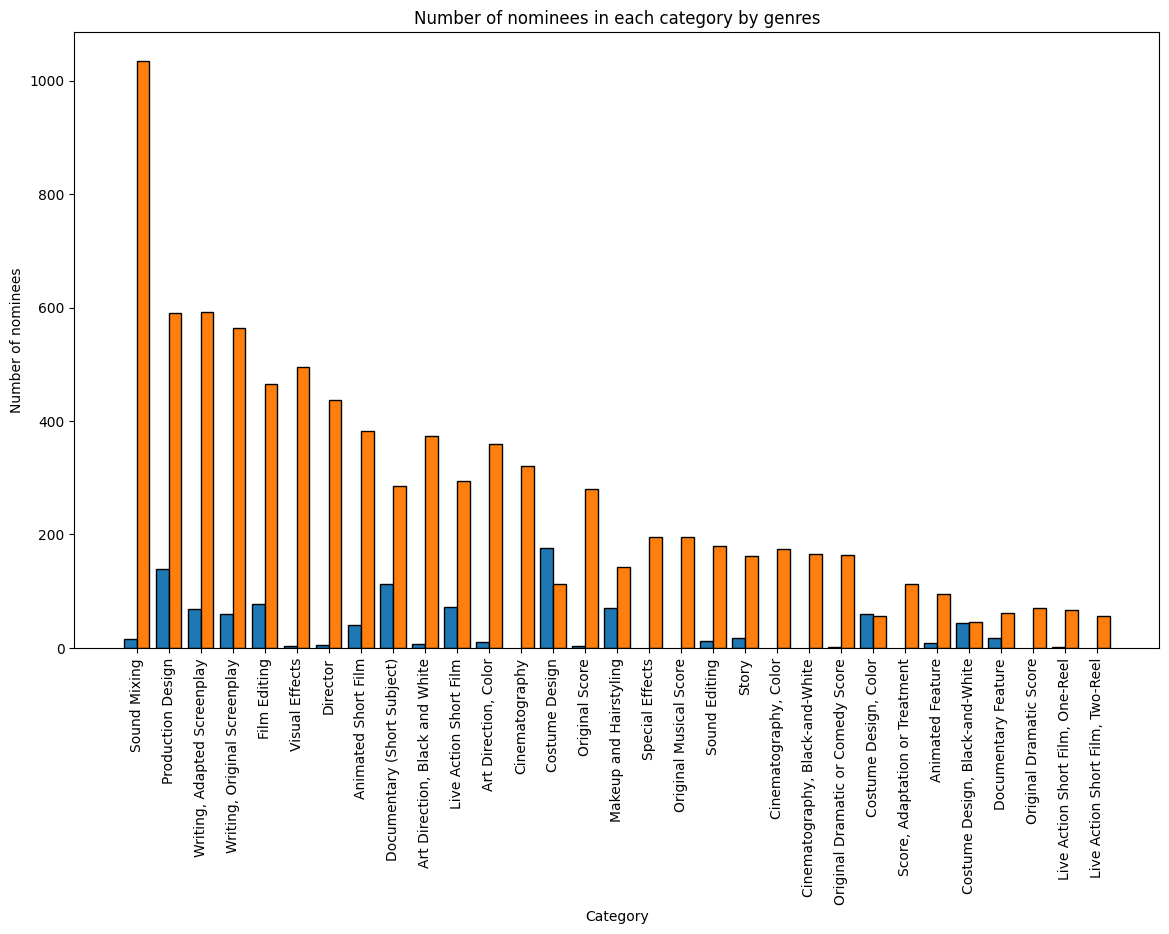

In [12]:
X_axis = np.arange(len(oscar_nominees_count))

plt.figure(figsize=(14,8))
plt.bar(X_axis - 0.2, oscar_nominees_count.females, 0.4, label = 'females',edgecolor = 'black')
plt.bar(X_axis + 0.2,oscar_nominees_count.males, 0.4, label = 'males',edgecolor = 'black')

 
plt.xticks(X_axis, oscar_nominees_count.index,rotation=90)
plt.xlabel("Category")
#plt.yscale('log')
plt.ylabel("Number of nominees")
plt.title("Number of nominees in each category by genres")


In [13]:
'''## compute confidence intervals 
confidence=0.95
oscar_nominees_count=oscar_nominees_count.fillna(0) #replace NaN values with 0
oscar_nominees_count['m']= oscar_nominees_count[['females', 'males']].mean(axis=1)
oscar_nominees_count['s']= oscar_nominees_count[['females', 'males']].std(axis=1)
t_crit = np.abs(t.ppf((1-confidence)/2,1))
oscar_nominees_count['error_down']=(oscar_nominees_count.m-oscar_nominees_count.s*t_crit)/np.sqrt(2)
oscar_nominees_count['error_up']=(oscar_nominees_count.m+oscar_nominees_count.s*t_crit)/np.sqrt(2)
oscar_nominees_count'''


"## compute confidence intervals \nconfidence=0.95\noscar_nominees_count=oscar_nominees_count.fillna(0) #replace NaN values with 0\noscar_nominees_count['m']= oscar_nominees_count[['females', 'males']].mean(axis=1)\noscar_nominees_count['s']= oscar_nominees_count[['females', 'males']].std(axis=1)\nt_crit = np.abs(t.ppf((1-confidence)/2,1))\noscar_nominees_count['error_down']=(oscar_nominees_count.m-oscar_nominees_count.s*t_crit)/np.sqrt(2)\noscar_nominees_count['error_up']=(oscar_nominees_count.m+oscar_nominees_count.s*t_crit)/np.sqrt(2)\noscar_nominees_count"

In [1]:
=======
    "#print tv tropes arrongant_kungfu_guy\n",
    "tv_tropes_clusters[tv_tropes_clusters['Trope'] == 'arrogant_kungfu_guy']"
>>>>>>> Stashed changes

SyntaxError: invalid syntax (3017607649.py, line 1)